In [1]:
# Import the necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()

'/home/jatin/Downloads/customer_churn_prediction-main/resarch'

In [3]:
os.chdir('../')

In [4]:
os.getcwd()

'/home/jatin/Downloads/customer_churn_prediction-main'

In [5]:
DATA_FILE = 'data/telco_customer_churn.csv'
df = pd.read_csv(DATA_FILE)

In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# Check the Shape of the data

df.shape

(7043, 21)

In [8]:
# Check for duplicate customer id

df['customerID'].duplicated().sum()

0

In [9]:
# Remove the customer Id as it is not necessary

df.drop('customerID',axis=1,inplace=True)

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Check the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
# Convert 1 and 0 of senior citizen as Yes and No so easy understanding

df['SeniorCitizen'] = df['SeniorCitizen'].map({1:"Yes",0:"No"})

In [13]:
# Convert Total Charges as Float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Count for the Null values in the dataframe

In [15]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- There are 11 Null values in TotalCharges column so we have to remove them

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### Check for the duplicate values in the dataset

In [18]:
df.duplicated().sum()

22

- It is showing 22 duplicate but there are no duplcate when the customer ID is there.

- Means there are for the different customers.

- But still if they are duplicate we have to remove them because our model can learn only by 1 record from there 22 records.

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

##### Summary statistics for numeric features

In [21]:
# Check the data types of the available features

df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- So there are 3 numerical columns tenure, MonthlyCharges, TotalCharges

In [22]:
df.describe(include=['float','int'])

,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


##### Count unique values in each column

In [23]:
# Check cardinality of categorical features ( no of categories in each column )

df.describe(include='object')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3535,5869,3617,4911,6330,3363,3090,3489,3079,3086,3464,2801,2773,3853,4158,2359,5153


In [24]:
for col in df.select_dtypes(include='object'):
    print(df[col].value_counts(normalize=True)*100)

gender
Male      50.42796
Female    49.57204
Name: proportion, dtype: float64
SeniorCitizen
No     83.723252
Yes    16.276748
Name: proportion, dtype: float64
Partner
No     51.597718
Yes    48.402282
Name: proportion, dtype: float64
Dependents
No     70.057061
Yes    29.942939
Name: proportion, dtype: float64
PhoneService
Yes    90.299572
No      9.700428
Name: proportion, dtype: float64
MultipleLines
No                  47.974322
Yes                 42.325250
No phone service     9.700428
Name: proportion, dtype: float64
InternetService
Fiber optic    44.079886
DSL            34.436519
No             21.483595
Name: proportion, dtype: float64
OnlineSecurity
No                     49.771755
Yes                    28.744650
No internet service    21.483595
Name: proportion, dtype: float64
OnlineBackup
No                     43.922967
Yes                    34.593438
No internet service    21.483595
Name: proportion, dtype: float64
DeviceProtection
No                     44.022825
Yes  

- Dependents column has inbalanced data.
- PhoneService column has inbalanced data
- MultipleLines column has inbalanced data
- Senior citizen column has inbalanced data.
- Contract column has inbalanced data.


##### Target distribution (Churn % vs Non-Churn %)

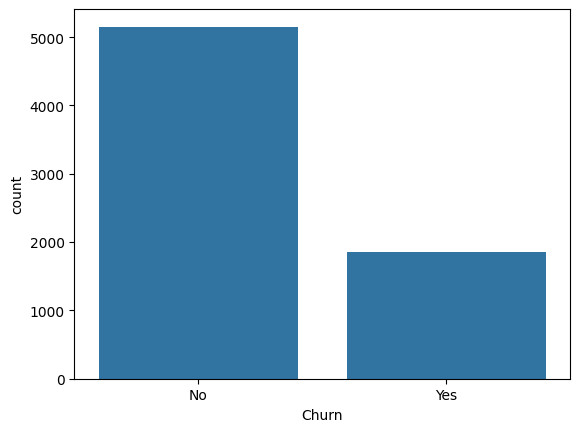

In [25]:
plt.Figure(figsize=(10,10))
sns.countplot(x=df['Churn'])
plt.show()

- Churn column has inbalanced data

## Univariate Analysis of Numerical features

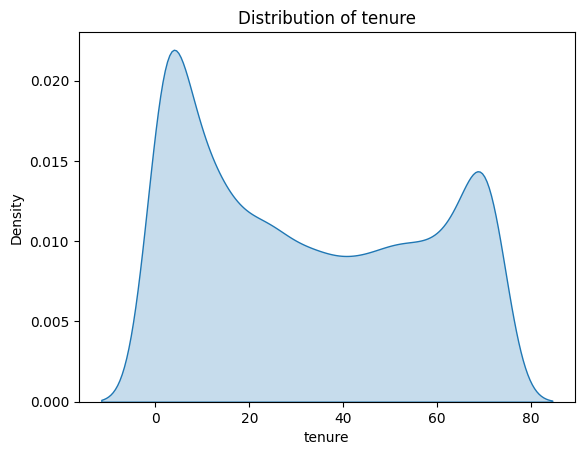

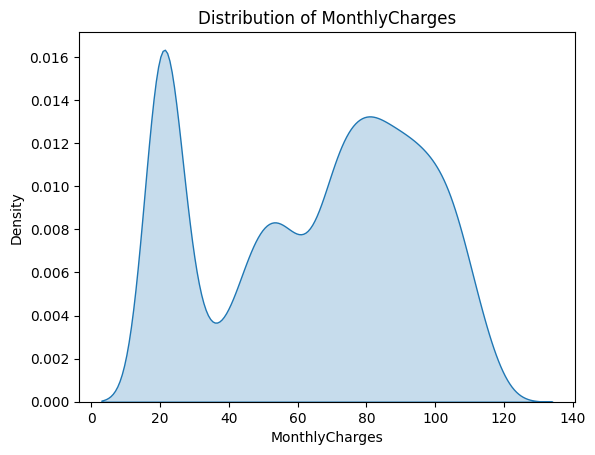

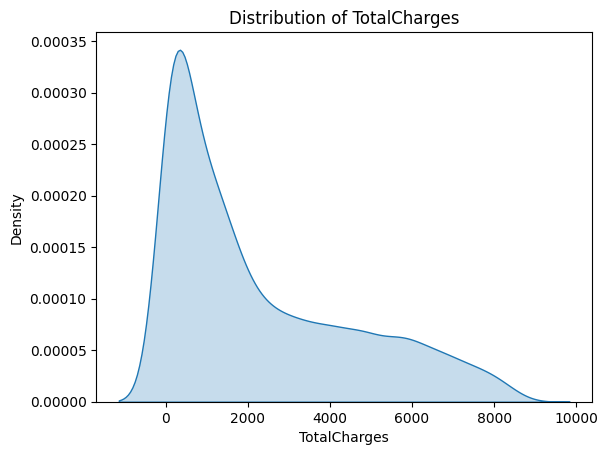

In [26]:
# Distribution of features

# plt.Figure(figsize=(10,10))
for col in df.select_dtypes(include=['int','float']):
    sns.kdeplot(df[col],fill=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.show()

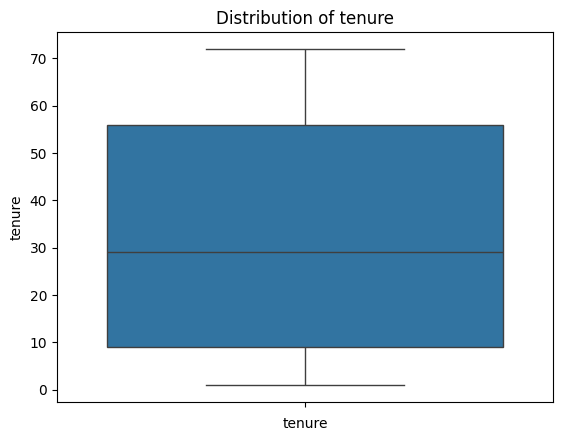

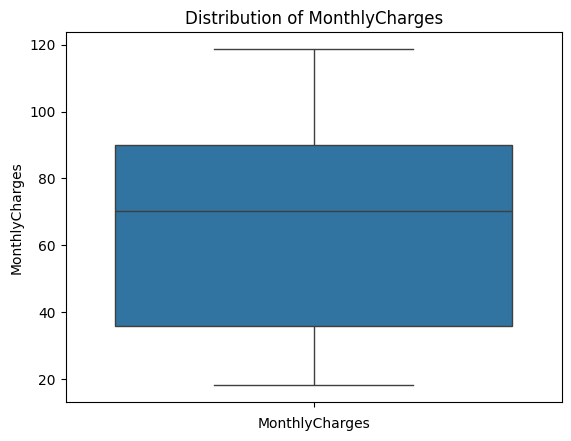

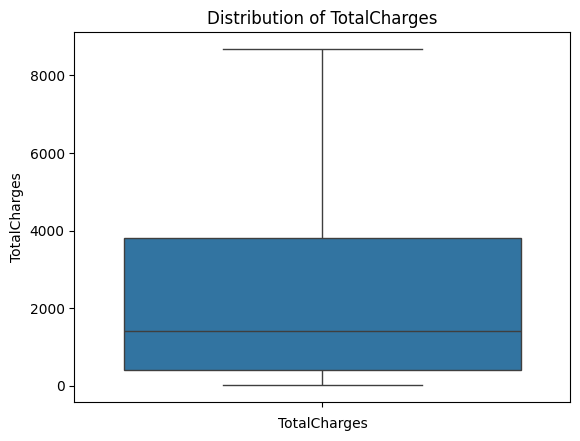

In [27]:
# Box of features

# plt.Figure(figsize=(10,10))
for col in df.select_dtypes(include=['int','float']):
    sns.boxplot(df[col],fill=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.show()

- There are not outliers in tenure, Monthly charges and Total Charges

In [28]:
df.corr(numeric_only=True, method='spearman')

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.272453,0.888195
MonthlyCharges,0.272453,1.000000,0.637034
TotalCharges,0.888195,0.637034,1.000000


- tenure and TotalCharges are highly correlated around ( 88% )
   
- MonthlyCharges and TotalCharges are highly correlated around ( 63% ) 

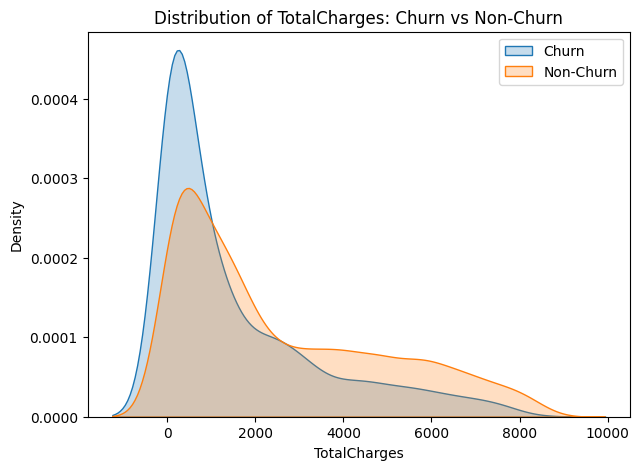

In [29]:
# Distribution overlap churn vs non-churn

plt.figure(figsize=(7, 5))

sns.kdeplot(
    data=df[df["Churn"] == "Yes"]["TotalCharges"],
    label="Churn",
    fill=True
)

sns.kdeplot(
    data=df[df["Churn"] == "No"]["TotalCharges"],
    label="Non-Churn",
    fill=True
)

plt.title("Distribution of TotalCharges: Churn vs Non-Churn")
plt.xlabel("TotalCharges")
plt.legend()
plt.show()


- Whose total charges till 2000 has more churn rate.

## Univariate analysis of Categorical features

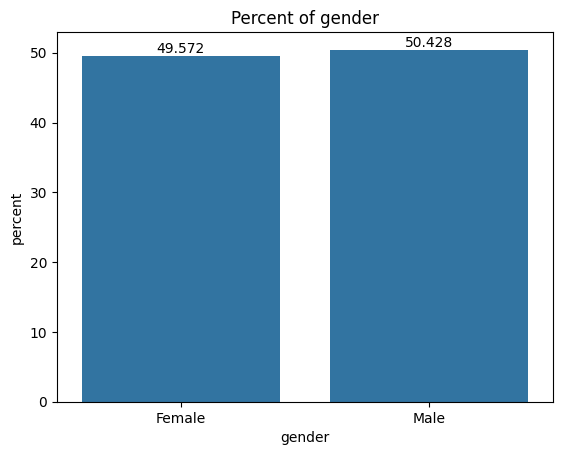

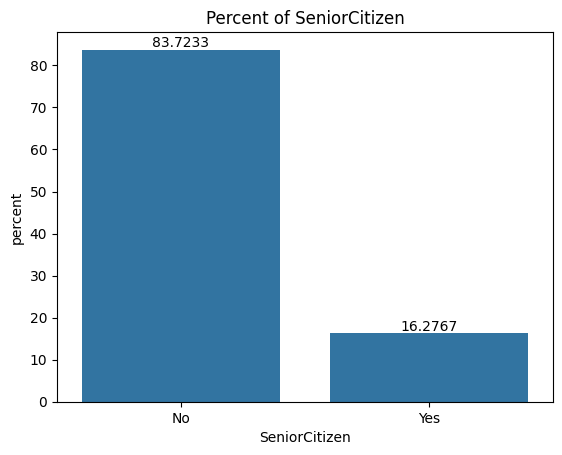

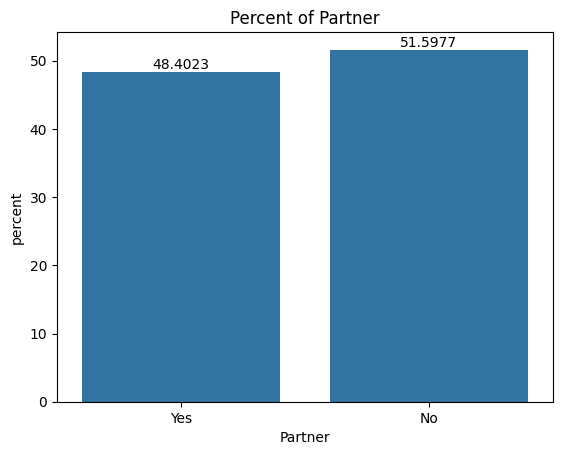

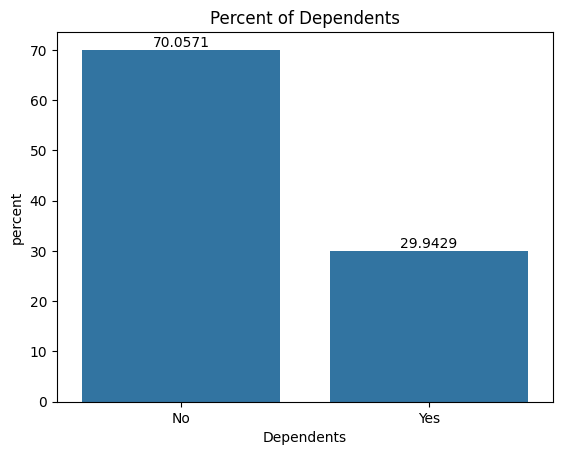

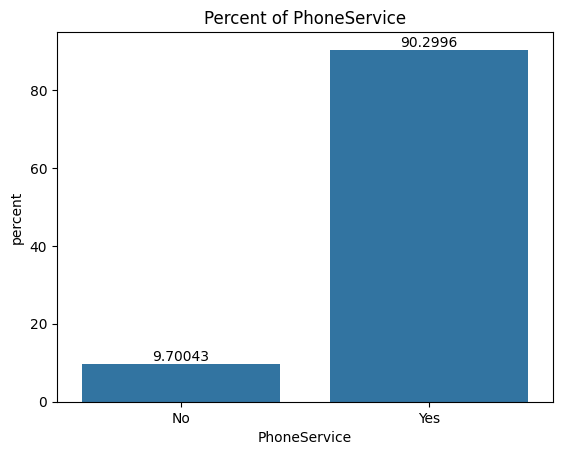

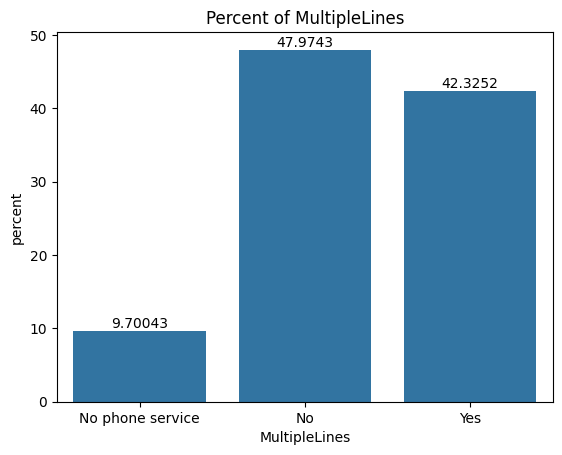

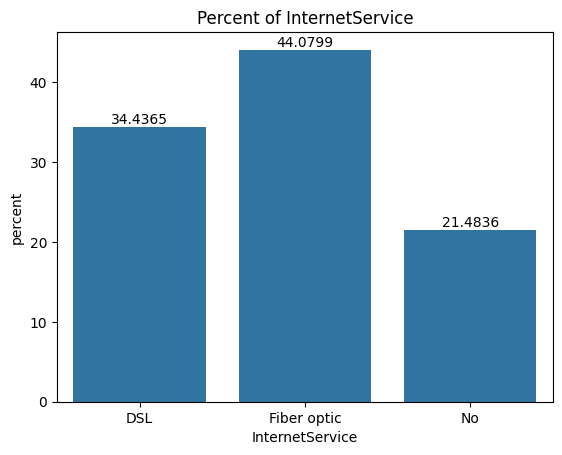

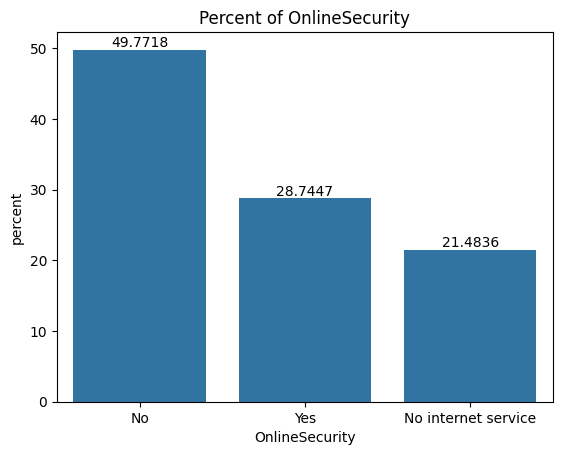

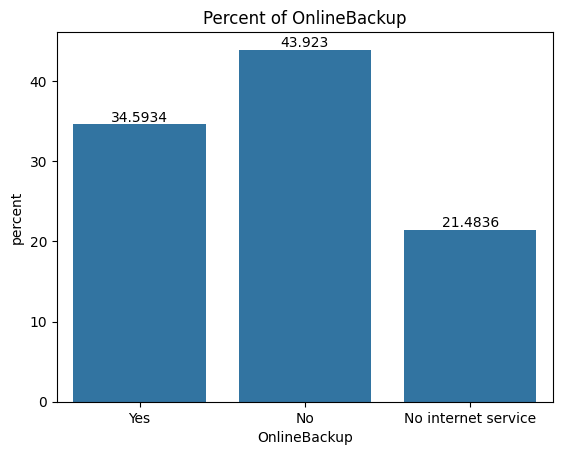

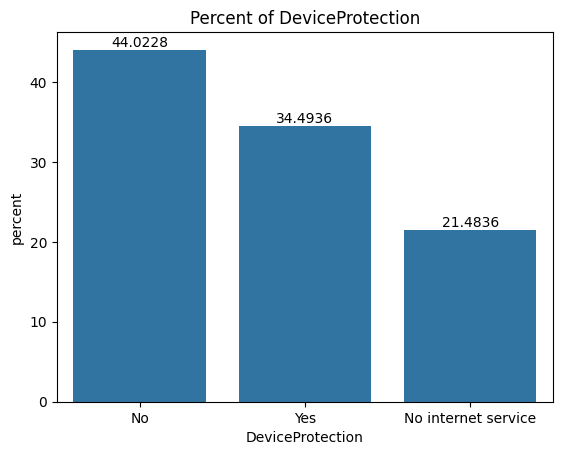

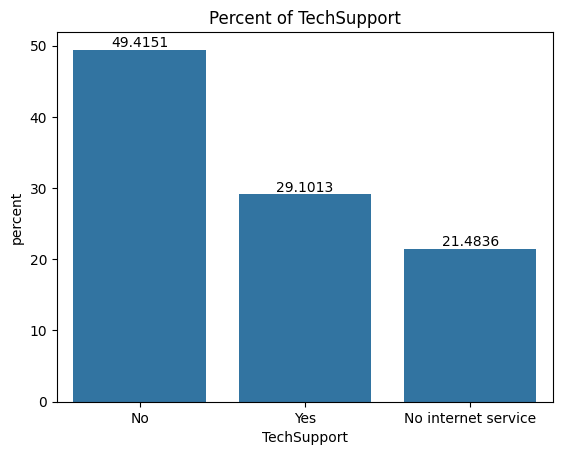

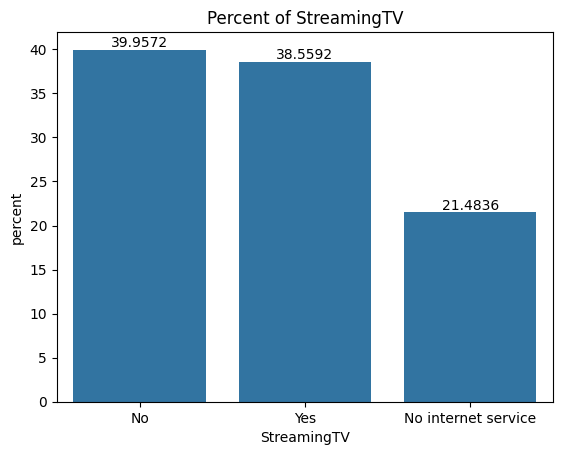

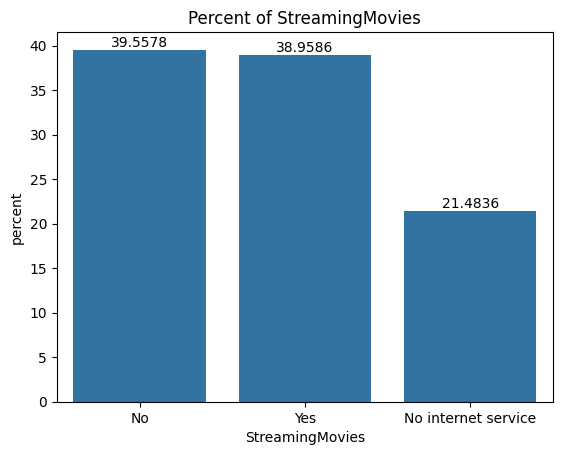

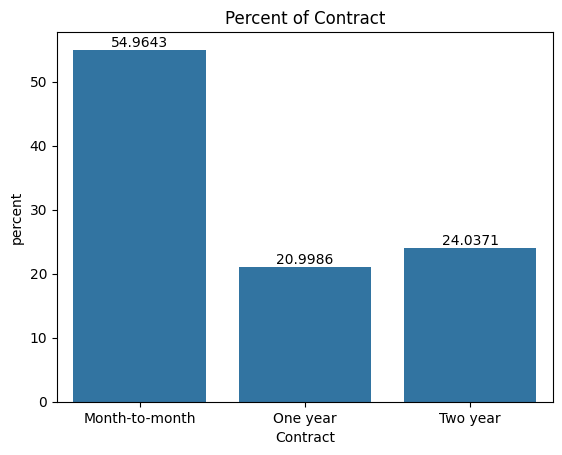

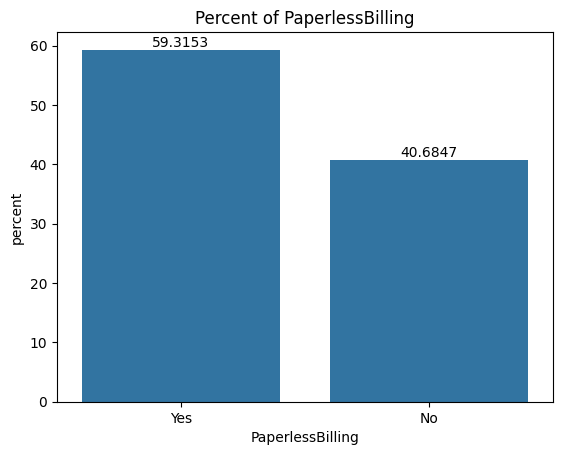

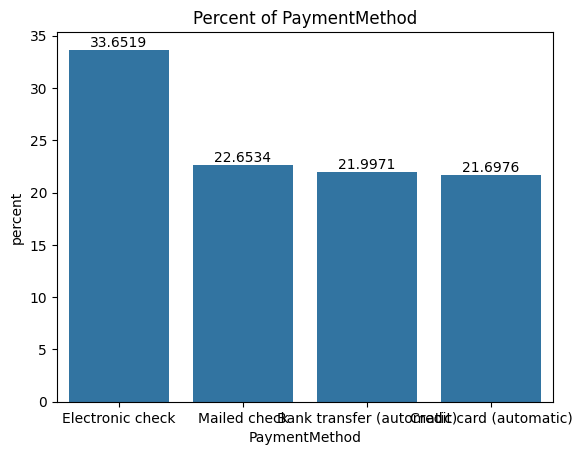

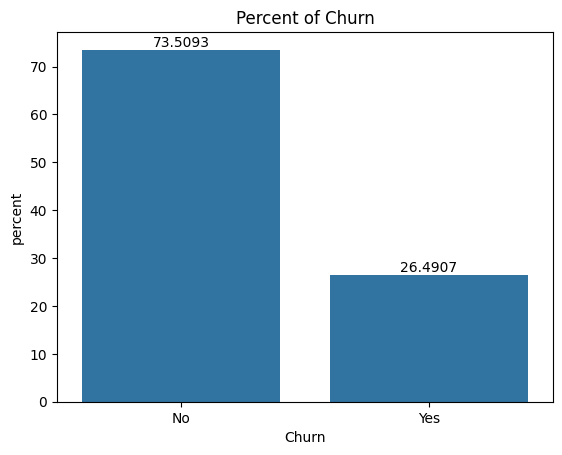

In [30]:
for col in df.select_dtypes(include='object'):
    ax = sns.countplot(x = df[col],stat='percent')
    # Add count labels on bars
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f"Percent of {col}")
    plt.xlabel(col)
    plt.show()

- By the above plots we can conclude that the below columns has inbalnced class data:

- SeniorCitizen, Dependents, Phone Service, Multiple Lines, Contact, Churn

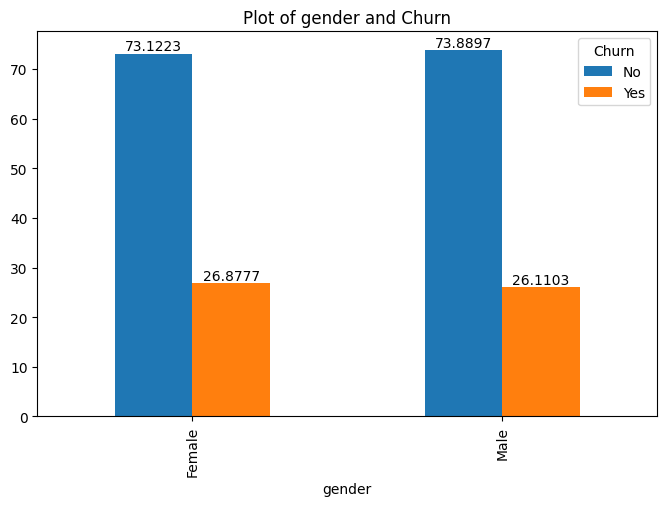

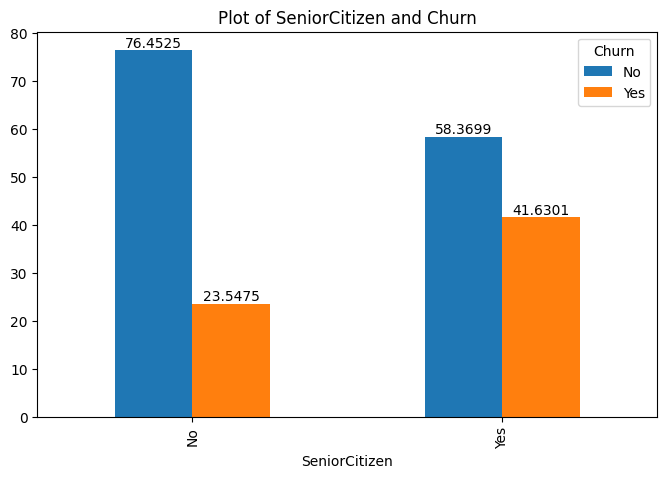

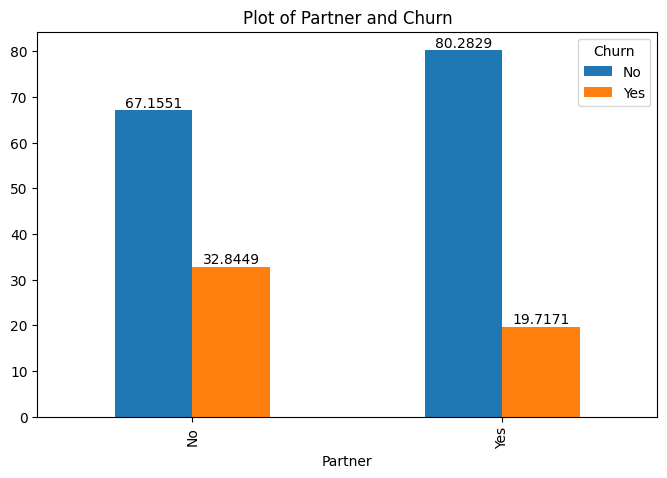

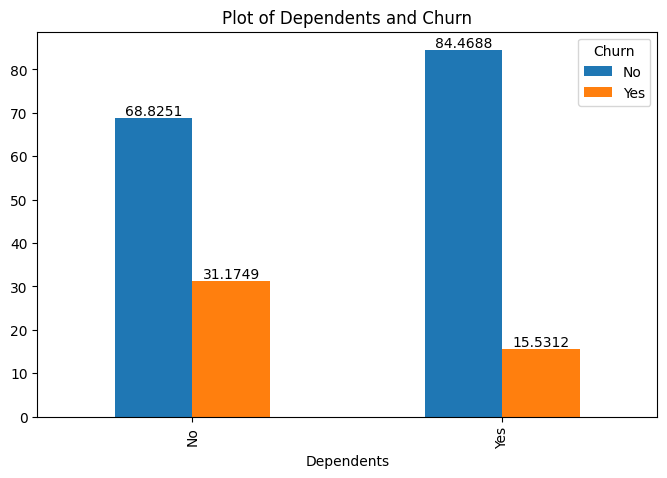

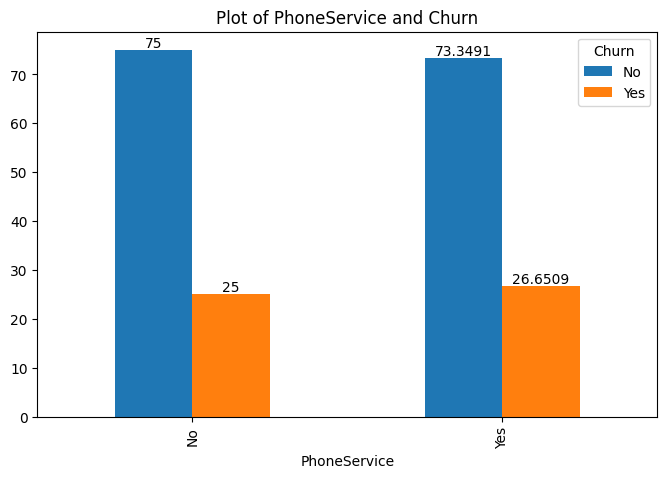

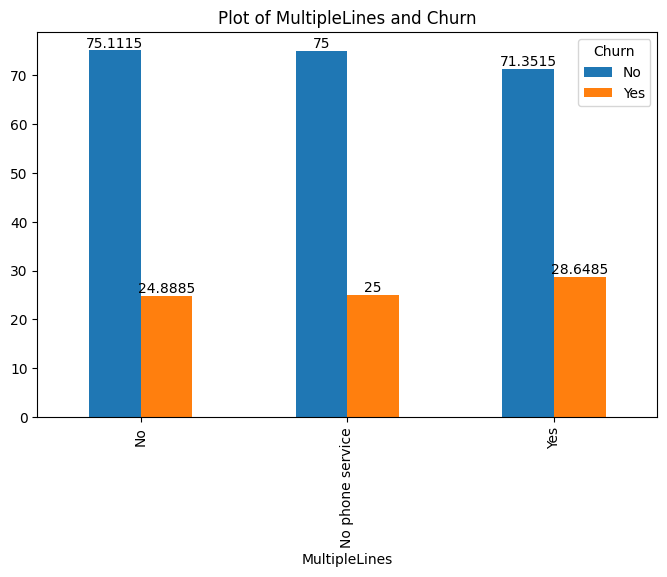

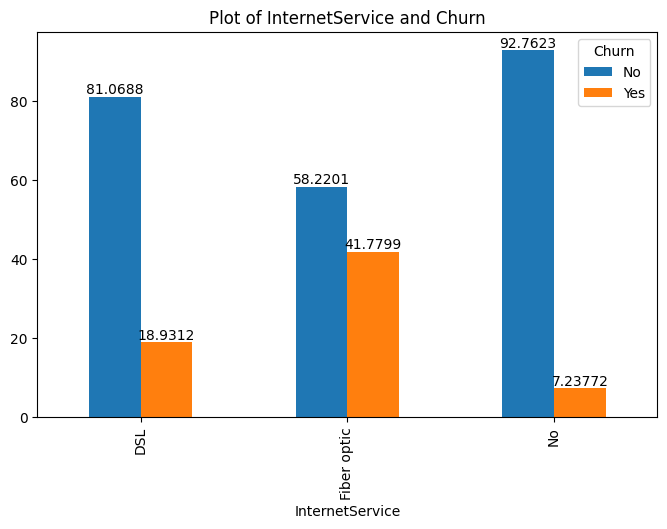

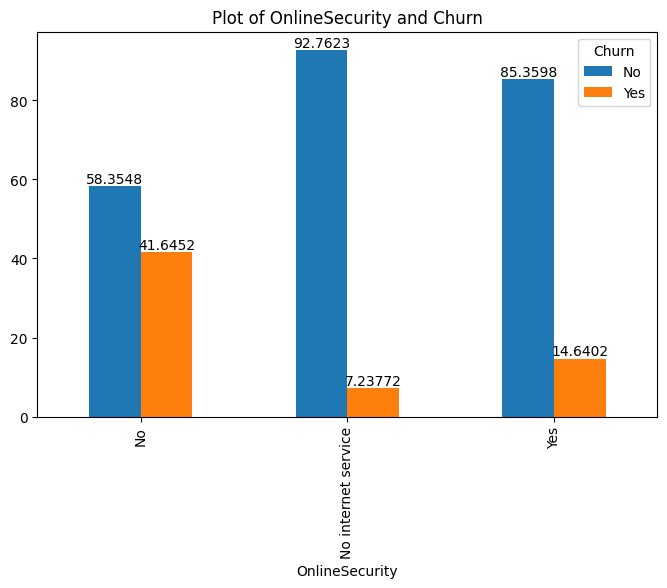

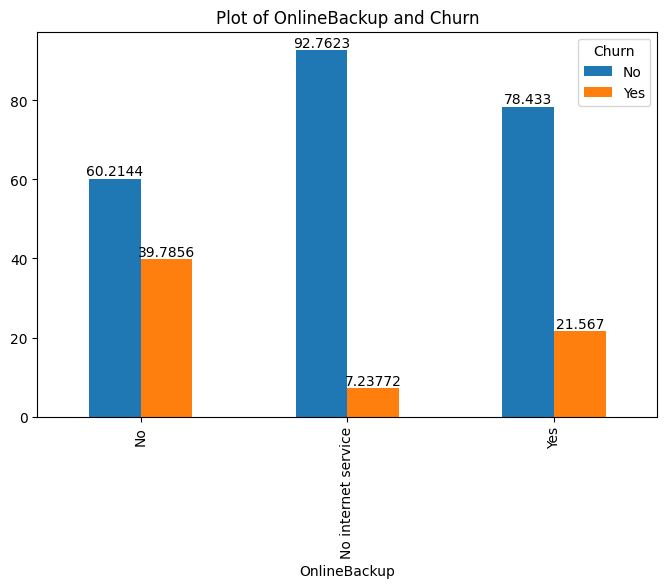

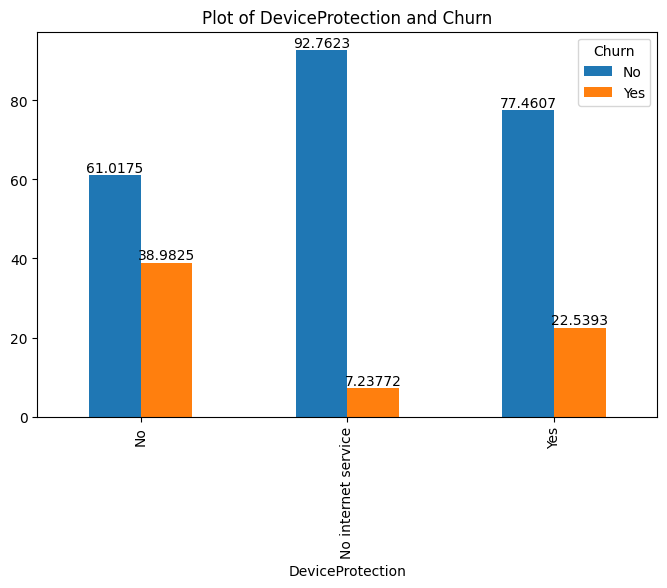

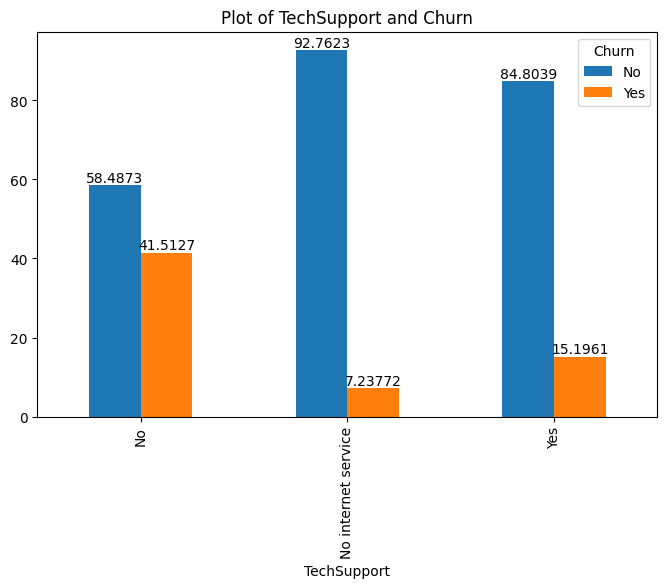

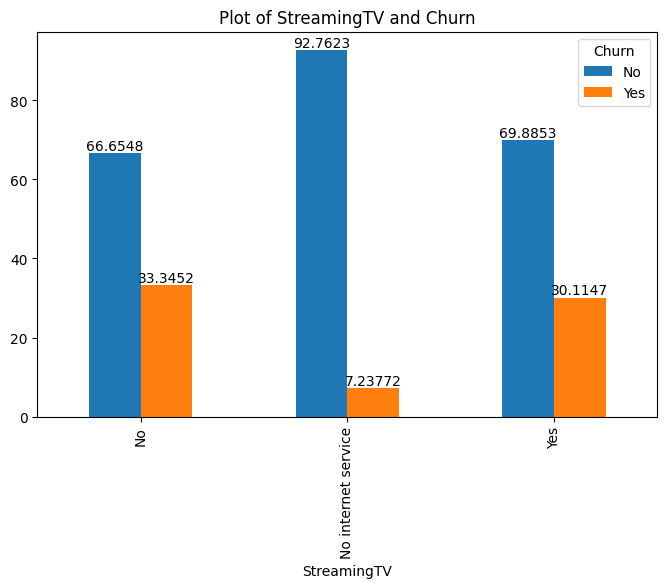

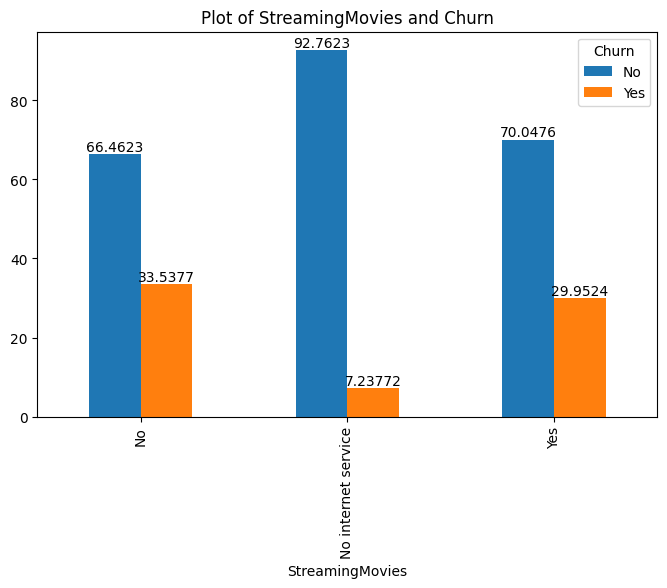

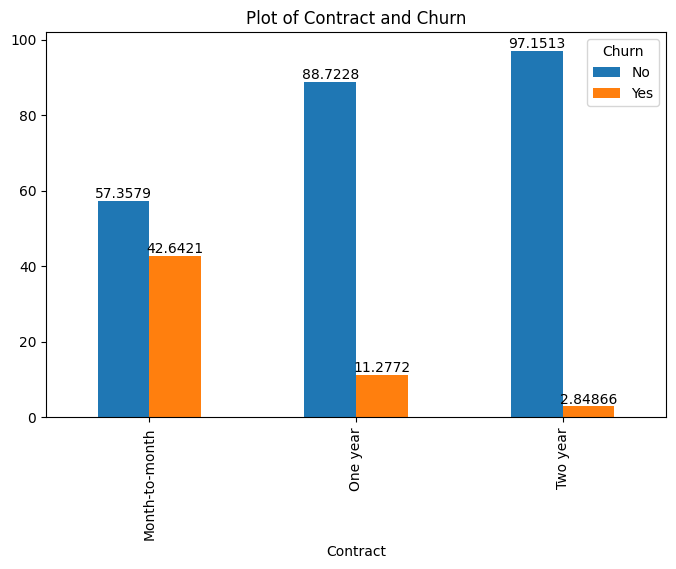

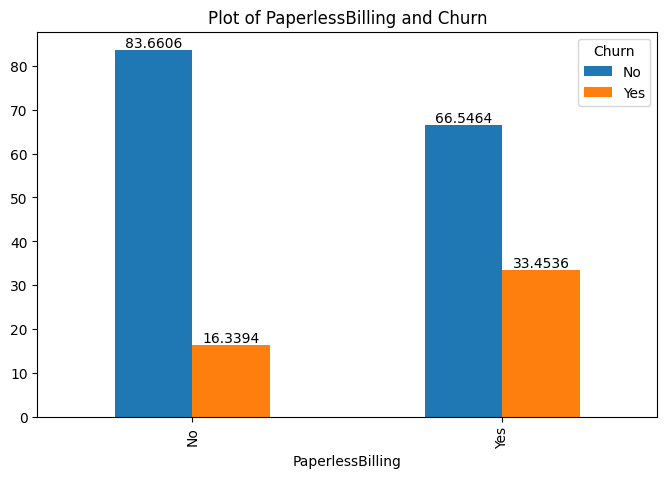

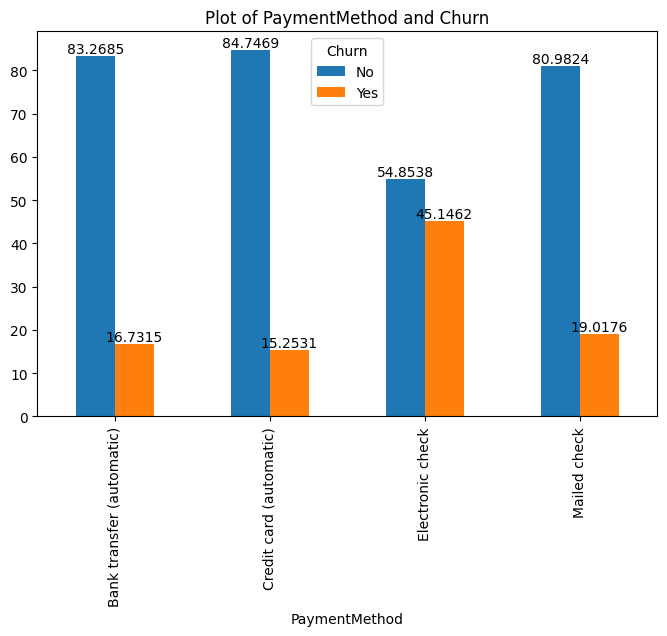

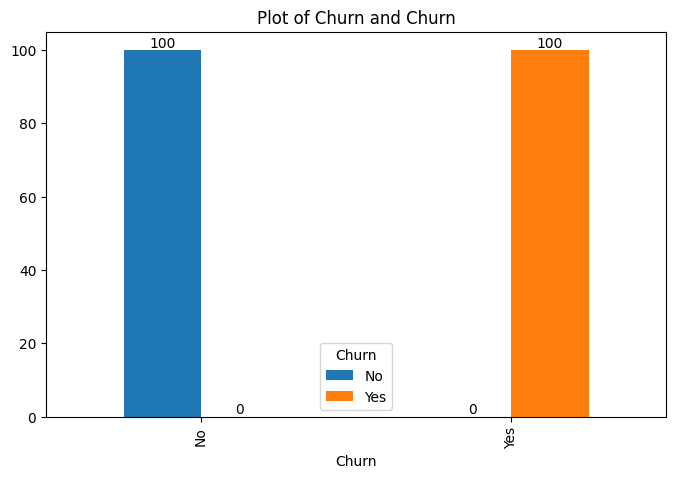

In [32]:
# Barplot of Categorical columns along with Churn

# It will tell “For each category of this feature, what percentage of customers churned vs not churned”

for col in df.select_dtypes(include='object'):
    ct = pd.crosstab(df[col], df["Churn"], normalize="index") * 100
    ax = ct.plot(kind="bar", figsize=(8,5))
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f"Plot of {col} and Churn")
    plt.xlabel(col)
    plt.show()

In [69]:
import pandas as pd

for col in df.select_dtypes(include='object'):
    ct = pd.crosstab(df[col], df["Churn"], normalize="index") * 100
    print(ct)



Churn          No        Yes
gender                      
Female  73.122302  26.877698
Male    73.889675  26.110325
Churn                 No        Yes
SeniorCitizen                      
Np             76.452547  23.547453
Yes            58.369851  41.630149
Churn           No        Yes
Partner                      
No       67.155101  32.844899
Yes      80.282935  19.717065
Churn              No        Yes
Dependents                      
No          68.825087  31.174913
Yes         84.468795  15.531205
Churn                No        Yes
PhoneService                      
No            75.000000  25.000000
Yes           73.349131  26.650869
Churn                    No        Yes
MultipleLines                         
No                75.111508  24.888492
No phone service  75.000000  25.000000
Yes               71.351534  28.648466
Churn                   No        Yes
InternetService                      
DSL              81.068766  18.931234
Fiber optic      58.220065  41.779935
N

- If person is senior citizen then the rate of churn is high
- If person is single then the rate of churn is high
- If the person is using Fiber Optic Internet service then the rate of churn is high
- If the person is not uisng online security then the rate of churn is high
- If the person is not uisng Online backup then the rate of churn is high
- If the person is not uisng Tech Support then the rate of churn is very very high
- If the person is using month to month then the rate of churn is very  high
- If the person is using Electronic check as payment method then the rate of churn is very very high

<Axes: xlabel='gender', ylabel='count'>

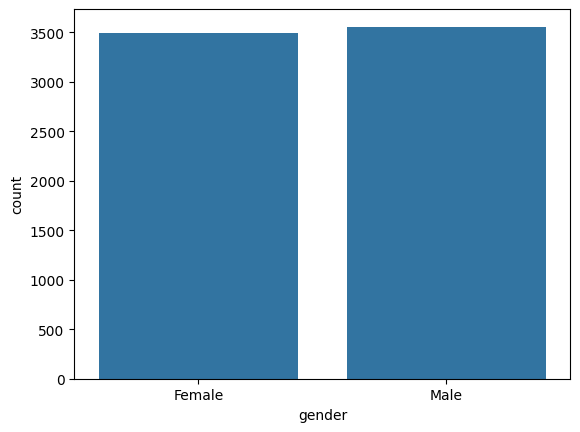

In [20]:
sns.countplot(x="gender", data=df)


<Axes: xlabel='gender', ylabel='TotalCharges'>

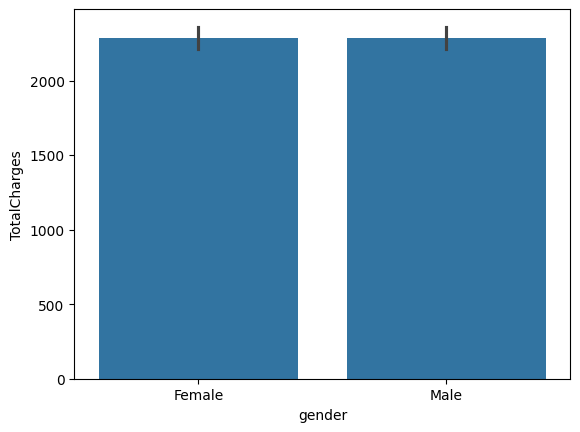

In [22]:
sns.barplot(x="gender", y="TotalCharges", data=df)


#### Final Summary till now by EDA

-------------------------

- SeniorCitizen column data is inbalanced.
- Dependents column data is inbalanced
- Phone Service column data is inbalanced
- Multiple Lines column data is inbalanced
- Contact column data is inbalanced
- Churn column data is inbalanced

-------------------------

- Total Chrges column has right skewed data
- Monthly charges column has not normally distributed data
- Tenure column has not normally distributed data
- There are not outliers in tenure, Monthly charges and Total Charges
- Tenure and TotalCharges are highly correlated
- TotalCharges and MonthlyCharges are also correlated

-------------------------

- If person is senior citizen then the rate of churn is high around 41 percent
- If person is single then the rate of churn is a little bit more( 33 percent ) as compared to when there is partner.
- If the person is using Fiber Optic Internet service then the rate of churn is high around 41 percent
- If the person is not uisng online security then the rate of churn is high around 41 percent
- If the person is not uisng Online backup then the rate of churn is high around 40 percent
- If the person is not uisng Tech Support then the rate of churn is around 38 percent
- If the person is not uisng Tech Support then the rate of churn is very very high around 41 percent
- If the person is using month to month Mothen the rate of churn is very  high around 43 percent
- If the person is using Electronic check as payment method then the rate of churn is very very high 45 percent

-------------------------

- Tenure and TotalCharges are highly correlated
- TotalCharges and MonthlyCharges are also correlated
- When there is no partner the churn rate is 32 percent.
- When the internet service is Fiber optic the churn rate is 41 percent which is very high 
- When there is no online security service then churn rate is 41 percent.
- The same for other services like OnlineBackup , Device protection , Tech support 
- For the month-to-month contract customers the chunk rate is 42 percent.
- When the payment method is electronic check the chunk rate is 45 percent.
- For the 0-12 month (new) customers the churn rate is 47 percent

----------------------------

- There are 22 duplicate rows without the customer ID

----------------------------

- We have converted the Total Charges columnn in the float format
- Remove the customer ID
- Drop the Null Values

----------------------------

- Our linear models require the data to be Normally Distributed therefore we have to apply standardization and Normalization
- Tree Based models does not require the data to be Normally Distributed therefore we can leave the values as it is.

----------------------------

- Remove the CustomerID
- Change the Total Charges to Float ( only for algos where we are not droping Total Charges at it is Hightly correlated )
- Remove Null and Duplicate values
- Need to convert Numerical features into Normal distribution ( only for algo which required Normal Distribution )
- Need to handle class inbalance
- Do the train and test split of the data.